In [1]:
! git clone https://github.com/cann-emma/myfork-3001labs.git

Cloning into 'myfork-3001labs'...
remote: Enumerating objects: 147, done.
remote: Counting objects: 100% (88/88), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 147 (delta 55), reused 51 (delta 34), pack-reused 59 (from 1)
Receiving objects: 100% (147/147), 20.90 MiB | 8.14 MiB/s, done.
Resolving deltas: 100% (64/64), done.
Updating files: 100% (24/24), done.


# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?
7. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
houses= pd.read_csv('/content/myfork-3001labs/04_hedonic_pricing/pierce_county_house_sales.csv')

In [4]:
print(houses.shape)
houses.head()

(16814, 19)


,sale_date,sale_price,house_square_feet,attic_finished_square_feet,basement_square_feet,attached_garage_square_feet,detached_garage_square_feet,fireplaces,hvac_description,exterior,interior,stories,roof_cover,year_built,bedrooms,bathrooms,waterfront_type,view_quality,utility_sewer
0,2020-01-02,380000,2157,0,0,528,0,0,Warm and Cool Air Zone,Frame Siding,Drywall,2,Composition Shingle,1993,3,3,NaN,NaN,SEWER/SEPTIC INSTALLED
1,2020-01-02,383000,2238,0,0,396,0,0,Forced Air,Frame Siding,Drywall,2,Composition Shingle,2017,4,3,NaN,NaN,SEWER/SEPTIC INSTALLED
2,2020-01-01,419900,1452,0,0,0,0,1,Forced Air,Frame Siding,Drywall,1,Built Up Rock,1965,3,2,NaN,NaN,SEWER/SEPTIC INSTALLED
3,2020-01-02,251660,832,0,0,0,0,0,Forced Air,Frame Vinyl,Drywall,1,Composition Shingle,1919,2,1,NaN,NaN,SEWER/SEPTIC INSTALLED
4,2020-01-02,500000,1780,0,384,484,0,1,Forced Air,Frame Siding,Drywall,1,Composition Shingle,1955,3,2,NaN,NaN,SEWER/SEPTIC INSTALLED


In [5]:
houses.describe()

,sale_price,house_square_feet,attic_finished_square_feet,basement_square_feet,attached_garage_square_feet,detached_garage_square_feet,fireplaces,stories,year_built,bedrooms,bathrooms
count,1.681400e+04,16814.000000,16814.000000,16814.000000,16814.000000,16814.000000,16814.000000,16814.000000,16814.000000,16814.000000,16814.000000
mean,4.612332e+05,1879.941953,24.945878,167.852861,364.425122,38.298501,0.889021,1.558285,1980.469252,3.277983,2.317176
std,2.360833e+05,760.419008,102.066417,429.065832,286.454018,164.691471,0.596731,0.512055,33.339025,0.891240,0.827956
min,2.000000e+03,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1880.000000,0.000000,0.000000
25%,3.480000e+05,1320.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1959.000000,3.000000,2.000000
50%,4.165000e+05,1774.000000,0.000000,0.000000,420.000000,0.000000,1.000000,2.000000,1990.000000,3.000000,2.000000
75%,5.238065e+05,2352.000000,0.000000,0.000000,528.000000,0.000000,1.000000,2.000000,2006.000000,4.000000,3.000000
max,6.130000e+06,9510.000000,1212.000000,4000.000000,2816.000000,3664.000000,5.000000,3.000000,2021.000000,25.000000,8.000000


In [11]:
print(houses['exterior'].unique())
print(houses['interior'].unique())
print(houses['roof_cover'].unique())

['Frame Siding' 'Frame Vinyl' 'Masonry Concrete Block'
 'Masonry Common Brick' 'Frame Stucco' 'Finished Cottage'
 'Frame Hardboard' 'Frame Rustic Log' 'Log' 'Unfinished Cottage'
 'Pine Finished Cabin' 'Cedar Finished Cabin' nan 'Cedar A-Frame'
 'Pine A-Frame' 'Cedar Unfinished Cabin' 'Pine Unfinished Cabin']
['Drywall' nan 'Paneling']
['Composition Shingle' 'Built Up Rock' 'Wood Shake' 'Concrete Tile'
 'Preformed Metal' 'Formed Seam Metal' nan]


In [13]:
houses['price_log']= np.log(houses['sale_price'])

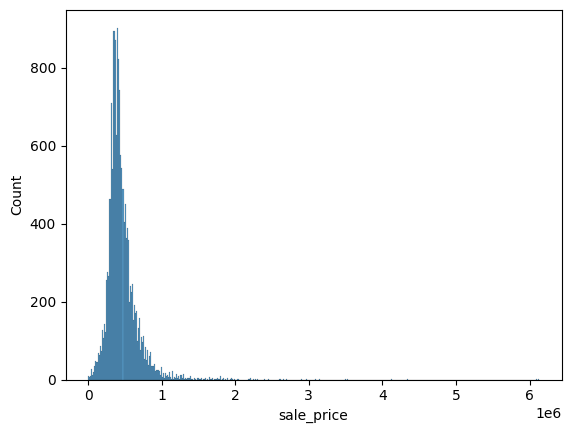

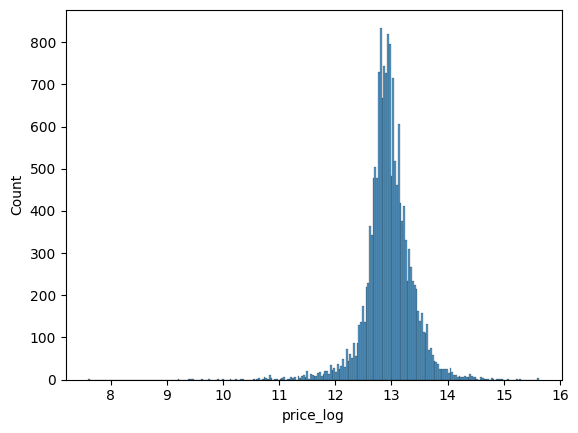

In [17]:
sns.histplot(houses, x= 'sale_price')
plt.show()
sns.histplot(houses, x= 'price_log')
plt.show()